문제: 데이터 분석 및 조건에 따른 값 추출  
데이터 설명  
아래와 같이 50개의 임의 데이터를 가진 ecommerce_data.csv 파일이 있습니다. 각 열의 설명은 다음과 같습니다.  

### 데이터 설명
- **CustomerID**: 고객 고유 ID
- **Name**: 고객 이름
- **Age**: 고객 나이
- **Gender**: 고객 성별
- **Country**: 고객이 거주하는 국가
- **PurchaseAmount**: 구매 금액 (달러)
- **PurchaseDate**: 구매 날짜 (YYYY-MM-DD 형식)
- **ProductCategory**: 구매한 제품 카테고리 (예: 'Electronics', 'Fashion', 'Home', 'Toys', 'Books')
- **Rating**: 제품 평점 (1-5)


In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# 임의 데이터 생성
np.random.seed(42)
random.seed(42)

# 고객 데이터 생성
data = {
    "CustomerID": np.arange(1, 51),
    "Name": [f"Customer_{i}" for i in range(1, 51)],
    "Age": np.random.choice([np.nan] + list(range(18, 70)), 50),
    "Gender": np.random.choice(["Male", "Female"], 50),
    "Country": np.random.choice(["USA", "Canada", "UK", "Germany", "France", np.nan], 50),
    "PurchaseAmount": np.random.choice([np.nan] + list(np.round(np.random.uniform(10, 500, 50), 2)), 50),
    "PurchaseDate": [
        datetime(2021, 1, 1) + timedelta(days=random.randint(0, 730)) for _ in range(50)
    ],
    "ProductCategory": np.random.choice(["Electronics", "Fashion", "Home", "Toys", "Books"], 50),
    "Rating": np.random.choice([np.nan] + list(range(1, 6)), 50),
}

df = pd.DataFrame(data)
df.to_csv("ecommerce_data.csv", index=False)
df

,CustomerID,Name,Age,Gender,Country,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,1,Customer_1,55.0,Female,USA,481.60,2022-10-17,Fashion,2.0
1,2,Customer_2,68.0,Male,nan,13.41,2021-04-25,Electronics,NaN
2,3,Customer_3,45.0,Female,France,481.60,2021-01-26,Home,NaN
3,4,Customer_4,31.0,Female,France,122.11,2021-10-09,Toys,3.0
4,5,Customer_5,59.0,Female,Canada,481.60,2021-09-08,Electronics,2.0
5,6,Customer_6,24.0,Female,France,285.03,2021-08-17,Electronics,2.0
6,7,Customer_7,37.0,Male,Canada,285.03,2021-05-23,Fashion,5.0
7,8,Customer_8,55.0,Female,USA,274.28,2021-04-15,Fashion,5.0
8,9,Customer_9,35.0,Male,Germany,320.37,2022-11-24,Home,5.0
9,10,Customer_10,39.0,Female,Germany,13.41,2022-07-13,Toys,5.0



### 문제 1: 결측값 처리 및 데이터 정리
1. **결측값 처리**:
   - `Age`, `Country`, `PurchaseAmount`, `Rating` 열에 결측값이 있는 경우, 각 열에 대해 결측값을 적절히 처리하세요.
     - `Age`: 중앙값으로 채움
     - `Country`: 'Unknown'으로 채움
     - `PurchaseAmount`: 평균값으로 채움
     - `Rating`: `Rating` 열의 결측값은 `ProductCategory`별 평균 평점으로 채우세요.
   
2. **데이터 형식 변환**:
   - `PurchaseDate` 열을 날짜 형식(`datetime`)으로 변환하세요.
   - `Rating` 열의 데이터 유형을 정수(`int`)로 변경하세요.

---

In [4]:
df.isnull().sum()

CustomerID         0
Name               0
Age                0
Gender             0
Country            0
PurchaseAmount     1
PurchaseDate       0
ProductCategory    0
Rating             9
dtype: int64

In [10]:
print(df.groupby("ProductCategory")["Rating"].mean())

ProductCategory
Books          4.500000
Electronics    3.363636
Fashion        3.428571
Home           4.285714
Toys           2.916667
Name: Rating, dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       50 non-null     int32         
 1   Name             50 non-null     object        
 2   Age              50 non-null     float64       
 3   Gender           50 non-null     object        
 4   Country          50 non-null     object        
 5   PurchaseAmount   49 non-null     float64       
 6   PurchaseDate     50 non-null     datetime64[ns]
 7   ProductCategory  50 non-null     object        
 8   Rating           41 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 3.4+ KB


In [34]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])
# Rating 열의 데이터 유형을 정수(int)로 변경하세요.
df["Rating"].fillna(df["Rating"].mode()[0], inplace=True)
df["Rating"] = df["Rating"].astype(int)

### 문제 2: 특정 고객 그룹 필터링
1. `Age`가 25세 이상 45세 이하인 **여성 고객** 중에서 `Country`가 **'USA'**인 고객을 선택하세요.
2. 선택된 고객 중 **2022년 이후에 구매한 고객**만 남겨서 `filtered_customers`라는 데이터프레임으로 저장하세요.

---

In [35]:
df_25_45 = df[(df["Age"] <= 45) & (df["Age"] >= 25)]
df_USA = df_25_45[df["Country"] == "USA"]
df_USA

C:\Users\nsh\AppData\Local\Temp\ipykernel_19556\3811670572.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_USA = df_25_45[df["Country"] == "USA"]


,CustomerID,Name,Age,Gender,Country,PurchaseAmount,PurchaseDate,ProductCategory,Rating
12,13,Customer_13,40.0,Male,USA,NaN,2022-03-09,Toys,4
16,17,Customer_17,40.0,Male,USA,101.42,2021-08-12,Electronics,2
18,19,Customer_19,38.0,Male,USA,219.50,2022-06-02,Books,4
35,36,Customer_36,44.0,Female,USA,380.22,2021-12-15,Home,5


In [36]:
filtered_customers = df_USA[df_USA["PurchaseDate"].dt.year >= 2022]
filtered_customers

,CustomerID,Name,Age,Gender,Country,PurchaseAmount,PurchaseDate,ProductCategory,Rating
12,13,Customer_13,40.0,Male,USA,NaN,2022-03-09,Toys,4
18,19,Customer_19,38.0,Male,USA,219.5,2022-06-02,Books,4


### 문제 3: 구매 금액과 평점에 따른 고객 등급
1. `filtered_customers`에서 `PurchaseAmount` 기준으로 고객을 **상위 20%**와 **하위 20%**로 나누세요.
   - 상위 20%는 'High Spender'로, 하위 20%는 'Low Spender'로 표시하세요.
   
2. **`Rating` 기준**으로 다음과 같은 고객 등급을 새 열 `RatingCategory`에 추가하세요:
   - `Rating`이 4 이상: 'Excellent'
   - `Rating`이 3 이상 4 미만: 'Good'
   - `Rating`이 2 이상 3 미만: 'Fair'
   - `Rating`이 2 미만: 'Poor'

---

In [37]:
df["PurchaseAmount"].describe()

count     49.000000
mean     218.647143
std      144.437432
min       13.410000
25%      101.420000
50%      168.370000
75%      320.370000
max      486.170000
Name: PurchaseAmount, dtype: float64

In [42]:
lower = df["PurchaseAmount"].quantile(0.2)
higher = df["PurchaseAmount"].quantile(0.8)
print(lower, higher)

df["SpenderCategory"] = pd.cut(df["PurchaseAmount"], bins=[0, lower, higher, float("inf")], labels=["Low Spender", "Mid Spender", "High Spender"], right=True)

89.0 383.24000000000007


In [48]:
df["RatingCategory"] = pd.cut(
    df["Rating"],
    bins=[0, 2, 3, 4, float("inf")],
    labels=["Poor", "Fair", "Good", "Excellent"],
    right=False
)
df.groupby("RatingCategory")["Rating"].count()

C:\Users\nsh\AppData\Local\Temp\ipykernel_19556\4096490367.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("RatingCategory")["Rating"].count()


RatingCategory
Poor          1
Fair         10
Good          9
Excellent    30
Name: Rating, dtype: int64

### 문제 4: 제품 카테고리별 통계
1. 전체 데이터를 대상으로 `ProductCategory`별로 **평균 구매 금액**과 **평균 평점**을 계산하세요.
2. 각 `ProductCategory`에서 구매 횟수가 가장 많은 고객의 **CustomerID와 총 구매 횟수**를 구하세요.

---

In [49]:
print(df.groupby("ProductCategory")["PurchaseAmount"].mean())
print(df.groupby("ProductCategory")["Rating"].mean())

ProductCategory
Books          236.132000
Electronics    212.652000
Fashion        243.243750
Home           268.843000
Toys           155.353636
Name: PurchaseAmount, dtype: float64
ProductCategory
Books          4.600000
Electronics    3.800000
Fashion        3.625000
Home           4.500000
Toys           2.916667
Name: Rating, dtype: float64


In [53]:
df_pur = df.groupby("ProductCategory")["PurchaseAmount"].mean()
df_pur
df_pur.sort_values(ascending=False).reindex(["Books", "Electronics", "Toys", "Home", "Fashion"], fill_value=0).reset_index()

,ProductCategory,PurchaseAmount
0,Books,236.132000
1,Electronics,212.652000
2,Toys,155.353636
3,Home,268.843000
4,Fashion,243.243750


In [56]:
# 2. 각 ProductCategory에서 구매 횟수가 가장 많은 고객의 CustomerID와 총 구매 횟수 구하기
# 각 고객의 구매 횟수를 구함
customer_purchase_counts = df.groupby(["ProductCategory", "CustomerID"]).size().reset_index(name="TotalPurchases")
print(customer_purchase_counts)

   ProductCategory  CustomerID  TotalPurchases
0            Books          19               1
1            Books          20               1
2            Books          38               1
3            Books          43               1
4            Books          49               1
5      Electronics           2               1
6      Electronics           5               1
7      Electronics           6               1
8      Electronics          12               1
9      Electronics          15               1
10     Electronics          17               1
11     Electronics          22               1
12     Electronics          23               1
13     Electronics          28               1
14     Electronics          31               1
15     Electronics          35               1
16     Electronics          37               1
17     Electronics          44               1
18     Electronics          46               1
19     Electronics          48               1
20         Fa

### 문제 5: 월별 구매 트렌드 분석
1. **2022년** 데이터만을 대상으로 `PurchaseDate`를 기준으로 월별 **총 구매 횟수**를 계산하고, 월별로 시각화하세요.
2. **평균 구매 금액**이 가장 높은 월과 가장 낮은 월을 구하세요.
---

In [92]:
df_2022 = df[df["PurchaseDate"].dt.year == 2022]
df_2022["PurchaseMonth"] = df_2022["PurchaseDate"].dt.month
# print(df_2022.head())
df_month = df_2022.groupby("PurchaseMonth")["Name"].count().reset_index()
df_month.columns = ["Month", "Count"]
df_month["Month"] = df_month["Month"].sort_values().reindex()

C:\Users\nsh\AppData\Local\Temp\ipykernel_19556\440462287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022["PurchaseMonth"] = df_2022["PurchaseDate"].dt.month


<Axes: xlabel='Month', ylabel='Count'>

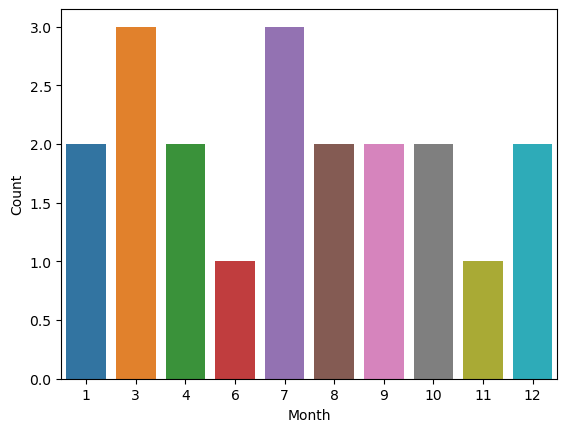

In [94]:
import seaborn as sns

sns.barplot(x='Month', y='Count', data=df_month)

In [95]:
# sort_index 외우기
monthly_purchase_counts = df_2022['PurchaseDate'].dt.month.value_counts().sort_index()
monthly_purchase_counts

PurchaseDate
1     2
3     3
4     2
6     1
7     3
8     2
9     2
10    2
11    1
12    2
Name: count, dtype: int64

In [115]:
#평균 구매 금액이 가장 높은 월과 가장 낮은 월을 구하세요.
df_mon = df_2022.groupby(df_2022["PurchaseDate"].dt.month)["PurchaseAmount"].mean()
df_mon = df_mon.reset_index()
df_mon.columns = ["Month", "PurchaseAmount"]
df_mon

,Month,PurchaseAmount
0,1,238.385
1,3,219.390
2,4,262.405
3,6,219.500
4,7,147.860
5,8,142.860
6,9,43.195
7,10,370.935
8,11,320.370
9,12,231.210


In [126]:
# 최대 최소값 뽑기
min_month = df_mon.iloc[df_mon["PurchaseAmount"].idxmin()]["Month"]
max_month = df_mon.iloc[df_mon["PurchaseAmount"].idxmax()]["Month"]

print(min_month, max_month)

9.0 10.0
